![sutd](img/sutd.png)
## <center>50.040 Natural Language Processing, Summer 2019<center>
<center>**Mini Project**

<center>**Due 17 June 2019, 5pm** <center>

**Write your student ID and name**

ID: 1002323

Name: Woong Wen Tat

Students with whom you have discussed (if any):

## Introduction

Language models are very useful for a wide range of applications, e.g., speech recognition and machine translation. Consider a sentence consisting of words $x_1, x_2, …, x_m$, where $m$ is the length of the sentence, the goal of language modeling is to model the probability of the sentence, where $m \geq 1$, $x_i \in V $ and $V$ is the vocabulary of the corpus:
$$p(x_1, x_2, …, x_m)$$
In this project, we are going to explore both statistical language model and neural language model on the [Wikitext-2](https://blog.einstein.ai/the-wikitext-long-term-dependency-language-modeling-dataset/) datasets.

## Statistical  Language Model

A simple way is to view words as independent random variables (i.e., zero-th order Markovian assumption). The joint probability can be written as:
$$p(x_1, x_2, …, x_m)=\prod_{i=1}^m p(x_i)$$
However, this model ignores the word order information, to account for which, under the first-order Markovian assumption, the joint probability can be written as:
$$p(x_0, x_1, x_2, …, x_m)= \prod_{i=1}^{m}p(x_i \mid x_{i-1})$$
Under the second-order Markovian assumption, the joint probability can be written as:
$$p(x_{-1}, x_0, x_1, x_2, …, x_m)= \prod_{i=1}^{m}p(x_i \mid x_{i-2}, x_{i-1})$$
Similar to what we did in HMM, we will assume that $x_{-1}=START, x_0=START, x_m = STOP$ in this definition, where $START, STOP$ are special symbols referring to the start and the end of a sentence.







### Parameter estimation

Let's use $count(u)$ to denote the number of times the unigram $u$ appears in the corpus, use $count(v, u)$ to denote the number of times the bigram $v, u$ appears in the corpus, and $count(w, v, u)$ the times the trigram $w, v, u$ appears in the corpus, $u \in V \cup STOP$ and $w, v \in V \cup START$.

And the parameters of the unigram, bigram and trigram models can be obtained using maximum likelihood estimation (MLE).

- In the unigram model, the parameters can be estimated as: $$p(u) = \frac {count(u)}{c}$$, where $c$ is the total number of words in the corpus.
- In the bigram model, the parameters can be estimated as:
$$p(u \mid v) = \frac{count(v, u)}{count(v)}$$
- In the trigram model, the parameters can be estimated as:
$$p(u \mid w, v) = \frac{count(w, v, u)}{count(w, v)}$$




### Smoothing the parameters
Note, it is likely that many parameters of bigram and trigram models will be 0 because the relevant bigrams and trigrams involved do not appear in the corpus. If you don't have a way to handle these 0 probabilities, all the sentences that include such bigrams or trigrams will have probabilities of 0.

We'll use a Add-k Smoothing method to fix this problem, the smoothed parameter can be estimated as:
$$p_{add-k}(u)= \frac{count(u)+k}{c+k|V^*|}$$
$$p_{add-k}(u \mid v)= \frac{count(v, u)+k}{count(v)+k|V^*|}$$
$$p_{add-k}(u \mid w, v)= \frac{count(w, v, u)+k}{count(w, v)+k|V^*|}$$

where $k \in (0, 1)$ is the parameter of this approach, and $|V^*|$ is the size of the vocabulary $V^*$,here $V^*= V \cup STOP$. One way to choose the value of $k$ is by
optimizing the perplexity of the development set, namely to choose the value that minimizes the perplexity.



### Perplexity

Given a test set $D^{\prime}$ consisting of sentences $X^{(1)}, X^{(2)}, …, X^{(|D^{\prime}|)}$, each sentence $X^{(j)}$ consists of words $x_1^{(j)}, x_2^{(j)},…,x_{n_j}^{(j)}$, we can measure the probability of each sentence $s_i$, and the quality of the language model would be the probability it assigns to the entire set of test sentences, namely:
$$\prod_j^{D^{\prime}}p(X^{(j)})$$
Let's define average log2 probability as:
$$l=\frac{1}{c^{\prime}}\sum_{j=1}^{|D^{\prime}|}log_2p(X^{(j)})$$
$c^{\prime}$ is the total number of words in the test set, $D^{\prime}$ is the number of sentences. And the perplexity is defined as:
$$perplexity=2^{-l}$$

The lower the perplexity, the better the language model.

#### Task 1 (4 points)
Remove the empty lines in the datasets, convert all the texts to lower cases, then compute counts of unigrams, bigrams, trigrams of the train corpus in the file "wiki.train.tokens". Do not take the START and STOP symbols into consideration for this task.
- List numbers of **unique** unigrams, bigrams and trigrams respectively.
- List 10 most frequent unigrams, bigrams and trigrams as well as their counts.

In [4]:
from nltk import word_tokenize, bigrams, trigrams
from collections import Counter

with open('data/wikitext-2-v1/wikitext-2/wiki.train.tokens') as file:
    tokens = []
    for lines in file.readlines():
        tokens.extend([token.lower() for token in word_tokenize(lines) if len(token) > 1])
    bigrams_tokens = bigrams(tokens)
    trigrams_tokens = trigrams(tokens)
    
    tokens_counter = Counter(tokens)
    bigrams_counter = Counter(bigrams_tokens)
    trigrams_counter = Counter(trigrams_tokens)
    
    print ("Unique unigrams", len(tokens_counter))
    print ("Unique bigrams", len(bigrams_counter))
    print ("Unique trigrams", len(trigrams_counter))
    print ("Top 10 unigrams", tokens_counter.most_common(10))
    print ("Top 10 bigrams", bigrams_counter.most_common(10))
    print ("Top 10 trigrams", trigrams_counter.most_common(10))

Unique unigrams 28768
Unique bigrams 633097
Unique trigrams 1316859
Top 10 unigrams [('the', 130768), ('of', 57030), ('unk', 54625), ('and', 50735), ('in', 44982), ('to', 39521), ('``', 28309), ('was', 21008), ('on', 15140), ('as', 15058)]
Top 10 bigrams [(('of', 'the'), 17326), (('in', 'the'), 11832), (('unk', 'unk'), 6080), (('to', 'the'), 6026), (('on', 'the'), 4516), (('the', 'unk'), 4429), (('and', 'the'), 4358), (('unk', 'and'), 4162), (('for', 'the'), 3714), (('at', 'the'), 3199)]
Top 10 trigrams [(('unk', 'unk', 'unk'), 1294), (('one', 'of', 'the'), 866), (('unk', 'and', 'unk'), 833), (('the', 'united', 'states'), 667), (('as', 'well', 'as'), 605), (('unk', 'unk', 'and'), 603), (('of', 'the', 'unk'), 596), (('``', 'unk', '``'), 590), (('unk', 'of', 'the'), 573), (('part', 'of', 'the'), 532)]


###### Task 2 (4 points)

Estimate the parameters for the bigram and trigram models through maximum-likelihood estimation respectively, compute the parameter for each n-gram in the file "ngram.txt", list down the n-grams that have 0 probability. 

Take the START and STOP symbols into consideration. For example, given a sentence "I like NLP", in a bigram model, we need to pad it as "START I like NLP STOP", in a trigram model, we need to pad it as "START START I like NLP STOP".

In [2]:
from collections import defaultdict

def parse_dataset(filepath):
    with open(filepath) as file:
        tokens = defaultdict(lambda:0,{})
        bigrams_tokens = defaultdict(lambda:0,{})
        trigrams_tokens = defaultdict(lambda:0,{})
        tokens_len = 0
        bigrams_tokens_len = 0
        trigrams_tokens_len = 0
        for lines in file.readlines():
            if word_tokenize(lines) != []:
                lines_tokenized = [token.lower() for token in word_tokenize(lines)]
                lines_tokenized.append('STOP')
                for token in lines_tokenized:
                    tokens_len += 1
                    tokens[token] += 1
                lines_tokenized.insert(0, 'START')
                
                bigrams_list = bigrams(lines_tokenized)
                for token in bigrams_list:
                    bigrams_tokens_len += 1
                    bigrams_tokens[token] += 1
                lines_tokenized.insert(0, 'START')
                
                trigrams_list = trigrams(lines_tokenized)
                for token in trigrams_list:
                    trigrams_tokens_len += 1
                    trigrams_tokens[token] += 1
        return tokens, bigrams_tokens, trigrams_tokens, tokens_len, bigrams_tokens_len, trigrams_tokens_len

In [5]:


zero_prob_ngrams = []
unigrams_list = []
bigrams_list = []
trigrams_list = []


train_unigrams, train_bigrams, train_trigrams, train_unigrams_len, train_bigrams_len, train_trigrams_len = parse_dataset('data/wikitext-2-v1/wikitext-2/wiki.train.tokens')
file_unigrams, file_bigrams, file_trigrams, _, __, ___ = parse_dataset('data/ngram.txt')

### MLE of ngram file with different parameters on train dataset             
            
for unigram in file_unigrams:
    if unigram in tokens:
        prob = train_unigrams[unigram]/train_unigrams_len
        unigrams_list.append((unigram, prob))
    else:
        zero_prob_ngrams.append(unigram)
        
for bigram in file_bigrams:
    if train_bigrams[bigram] == 0 or bigram[0] in zero_prob_ngrams:
        zero_prob_ngrams.append(bigram)
    else:
        if bigram[0] == 'START':
            prob = train_bigrams[bigram]/train_unigrams_len
        else:
            prob = train_bigrams[bigram]/train_unigrams[bigram[0]]
        if prob == 0:
            zero_prob_ngrams.append(bigram)
            break
        bigrams_list.append((bigram, prob))
    
for trigram in file_trigrams:
    if train_trigrams[trigram] == 0 or trigram[0:2] in zero_prob_ngrams:
        zero_prob_ngrams.append(trigram)
    else:
        if trigram[0:2] == (('START', 'START')):
            prob = train_trigrams[trigram]/train_bigrams_len
        else:
            prob = train_trigrams[trigram]/train_bigrams[trigram[0:2]]
        if prob == 0:
            zero_prob_ngrams.append(trigram)
            break
        trigrams_list.append((trigram, prob))
    
print(zero_prob_ngrams, "\n")
print("Unigrams: ", unigrams_list, "\n")
print("Bigrams: ", bigrams_list, "\n")
print("Trigrams: ", trigrams_list)

['STOP', 'a', ('computer', 'STOP'), ('START', 'go'), ('to', 'STOP'), ('START', 'have'), ('had', 'STOP'), ('START', 'can'), ('can', 'sea'), ('sea', 'STOP'), ('a', 'number'), ('of', 'STOP'), ('good', 'bad'), ('bad', 'STOP'), ('with', 'STOP'), ('the', 'computer', 'STOP'), ('START', 'START', 'go'), ('START', 'go', 'to'), ('go', 'to', 'STOP'), ('START', 'START', 'have'), ('START', 'have', 'had'), ('have', 'had', 'STOP'), ('and', 'the', 'STOP'), ('START', 'START', 'can'), ('START', 'can', 'sea'), ('can', 'sea', 'STOP'), ('a', 'number', 'of'), ('number', 'of', 'STOP'), ('START', 'with', 'respect'), ('respect', 'to', 'STOP'), ('terms', 'of', 'STOP'), ('START', 'not', 'good'), ('not', 'good', 'bad'), ('good', 'bad', 'STOP'), ('START', 'first', 'start'), ('first', 'start', 'with'), ('start', 'with', 'STOP')] 

Unigrams:  [('the', 0.058595663128707655), ('computer', 6.094006320739203e-05), ('go', 0.00013577087611646901), ('to', 0.01770891351484809), ('have', 0.0015548677891886054), ('had', 0.0025

#### Task 3 (6 points)
Use the Add-k smoothing method to smooth parameters of bigram and trigram models respectively, choose the parameter $k$ from the set {0.1, 0.3, 0.5, 0.7, 0.9} on the development set for each model. Compute the smoothed parameters of n-grams in the file "ngram.txt". The development data is in the file "wiki.valid.tokens".

In [8]:
import math

best_bigram_k = 0
best_trigram_k = 0
best_bigram_perplexity = 10e10
best_trigram_perplexity = 10e10
valid_unigrams, valid_bigrams, valid_trigrams, valid_unigrams_len, valid_bigrams_len, valid_trigrams_len = parse_dataset('data/wikitext-2-v1/wikitext-2/wiki.valid.tokens')

### MLE + add-k smoothing of ngram file with different parameters on dev dataset to find best k 

for k in [0.1, 0.3, 0.5, 0.7, 0.9]:
    sum_bigram_probs = 0
    sum_trigram_probs = 0
    
    for bigram in valid_bigrams:
        if bigram[0] == 'START':
            prob = (train_bigrams[bigram]+k)/((1+k)*train_unigrams_len)
        else:
            prob = (train_bigrams[bigram]+k)/(train_unigrams[bigram[0]]+k*train_unigrams_len)
        sum_bigram_probs += math.log2(prob)


    for trigram in valid_trigrams:
        if trigram[0:2] == (('START', 'START')):
            prob = (train_trigrams[trigram]+k)/(train_bigrams_len+k*train_unigrams_len)
        else:
            prob = (train_trigrams[trigram]+k)/(train_bigrams[trigram[0:2]]+k*train_unigrams_len)
        sum_trigram_probs += math.log2(prob)
        
    sum_bigram_probs /= train_unigrams_len
    sum_trigram_probs /= train_unigrams_len
    bigram_perplexity = 2**-sum_bigram_probs
    trigram_perplexity = 2**-sum_trigram_probs
    if bigram_perplexity < best_bigram_perplexity:
        best_bigram_perplexity = bigram_perplexity
        best_bigram_k = k
    if trigram_perplexity < best_trigram_perplexity:
        best_trigram_perplexity = trigram_perplexity
        best_trigram_k = k
    print ("bigram_perplexity", bigram_perplexity)
    print ("trigram_perplexity", trigram_perplexity)
        
        
### now test on the file bigrams

bigrams_list = []
trigrams_list = []

for bigram in file_bigrams:
    if bigram[0] == 'START':
        prob = (train_bigrams[bigram]+best_bigram_k)/((1+best_bigram_k)*train_unigrams_len)
    else:
        prob = (train_bigrams[bigram]+best_bigram_k)/(train_unigrams[bigram[0]]+best_bigram_k*train_unigrams_len)
    bigrams_list.append((bigram, prob))

for trigram in file_trigrams:
    if trigram[0:2] == (('START', 'START')):
        prob = (train_trigrams[trigram]+best_trigram_k)/(train_bigrams_len+best_trigram_k*train_unigrams_len)
    else:
        prob = (train_trigrams[trigram]+best_trigram_k)/(train_bigrams[trigram[0:2]]+best_trigram_k*train_unigrams_len)
    trigrams_list.append((trigram, prob))


print ("Trigram list: ", trigrams_list)
print ("\n")
print ("Bigram list: ", bigrams_list)

bigram_perplexity 1.6612442720659086
trigram_perplexity 2.6956106007022
bigram_perplexity 1.7021428089138655
trigram_perplexity 2.7552935212721907
bigram_perplexity 1.7209098507269796
trigram_perplexity 2.781442810769719
bigram_perplexity 1.7328812760245302
trigram_perplexity 2.7976980213419904
bigram_perplexity 1.7415291291206842
trigram_perplexity 2.809212793017292
Trigram list:  [(('START', 'START', 'the'), 0.00136630391713846), (('START', 'the', 'computer'), 4.855995454788254e-06), (('the', 'computer', 'STOP'), 4.480625997219324e-07), (('START', 'START', 'go'), 4.073533636857756e-08), (('START', 'go', 'to'), 4.480887000543532e-07), (('go', 'to', 'STOP'), 4.480084010535366e-07), (('START', 'START', 'have'), 4.073533636857756e-08), (('START', 'have', 'had'), 4.480887000543532e-07), (('have', 'had', 'STOP'), 4.4800037273631014e-07), (('START', 'START', 'and'), 8.18780261008409e-06), (('START', 'and', 'the'), 9.409019486079357e-06), (('and', 'the', 'STOP'), 4.3951967531802545e-07), (('

In [12]:
print (best_bigram_k)
print (best_trigram_k)
print (best_bigram_perplexity)
print (best_trigram_perplexity)

0.1
0.1
1.6612442720659086
2.6956106007022


#### Task 4 (4 points)

Use the smoothed bigram and trigram models to compute the perplexity of the test set in the file  "wiki.test.tokens" respectively. Which model has a lower perplexity?

In [11]:
### extract unigrams, bigrams and trigrams from test dataset

test_unigrams, test_bigrams, test_trigrams, test_unigrams_len, test_bigrams_len, test_trigrams_len = parse_dataset('data/wikitext-2-v1/wikitext-2/wiki.test.tokens')

### calculate perplexity of test dataset based on best k values

sum_bigram_probs = 0
sum_trigram_probs = 0

for key, value in test_bigrams.items():
    if key[0] == 'START':
        prob = (train_bigrams[bigram]+best_bigram_k)/((1+best_bigram_k)*test_unigrams_len)
    else:
        prob = (train_bigrams[bigram]+best_bigram_k)/(train_unigrams[key[0]]+best_bigram_k*train_unigrams_len)
    sum_bigram_probs += math.log2(prob)

for key, value in test_trigrams.items():
    if key[0:2] == (('START', 'START')):
        prob = (train_trigrams[bigram]+best_trigram_k)/(test_trigrams_len+best_trigram_k*train_unigrams_len)
    else:
        prob = (train_trigrams[bigram]+best_trigram_k)/(train_bigrams[key[0:2]]+best_trigram_k*test_unigrams_len)
    sum_trigram_probs += math.log2(prob)

sum_bigram_probs /= train_unigrams_len
sum_trigram_probs /= train_unigrams_len
bigram_perplexity = 2**-sum_bigram_probs
trigram_perplexity = 2**-sum_trigram_probs
print ("bigram_perplexity", bigram_perplexity)
print ("trigram_perplexity", trigram_perplexity)

bigram_perplexity 1.9184161405416538
trigram_perplexity 2.730574916284933


## Neural Language Model

Using the chain rule, the probability of a sentence consisting of words $x_1, x_2, ..., x_n$ can be represented as:

$$p(x_1, x_2, ..., x_n) = \prod_{i=1}^n p(x_t \mid x_{t-1}, ..., x_1)$$

Assume that we can use a hidden vector $h_t\in R^d$ of a recurrent neural network (RNN) to record the history information of words:
$$h_t = RNN(x_t, h_{t-1})$$

The conditional probability of word $x_{t+1}$ can be parameterized as:
$$p(x_{t+1} \mid x_{t}, x_{t-1}, ..., x_1) \propto exp(f(w_{x_{t+1}}h_{t}))$$

$d$ is the dimension size of the hidden layer, $|V|$ is the size of the vocabulary. $f$ is a fully-connected layer, where $w \in R^{|V| \times d}$ are the parameters, $w_{x_{t+1}}$ is the parameter in the row that corresponds to the index of $x_{t+1}$ in the vocabulary, the bias is omitted. 



#### Task 5 (12 points)
We will create a LSTM language model, and train it on the [Wikitext-2](https://blog.einstein.ai/the-wikitext-long-term-dependency-language-modeling-dataset/) dataset. The data generators(train_iter, valid_iter, test_iter) and the LSTM model(in the file "lstm\_model.py") have been provided. The word embeddings together with the parameters in the LSTM model will be learned from scratch.
Our tasks:
- Complete the training and evaluating code, tune hyperparameters on the validation data, then compute the perplexity of the test data. The test perplexity should be below 150. (5 points)
- Visualize word embeddings trained by our language model as in Homework 1, try to find patterns, i.e., are similar words clustering? (2 points)
- Implement a 2-layer bidirectional LSTM language model as shown in Fig 1, train the language model from both directions, compute the perplexity of the test data for each direction. Note, the forward and backward LSTMs do not share parameters, and the outputs from the previous layer can be only passed to the next layer in the same direction. (5 points)
![bilstm](img/bilstm.png)

<center>Fig 1: 2-layer Bidirectionl LSTM Language Model Architecture

The START and STOP symbols have been added to the sentences in the generators, and the second dimension of the outputs of generators is the index of the batch.

[Pytorch](https://pytorch.org/tutorials/) is required in this part. Do not make any changes to the provided code unless you are requested to do so. 

In [4]:
#load packages
import torchtext
import torch
from torchtext.datasets import WikiText2
from torch import nn, optim
from torchtext import data
from nltk import word_tokenize
from lstm_model import LSTMModel
torch.manual_seed(222)

In [5]:
def tokenizer(text):
    '''Tokenize a string to words'''
    return word_tokenize(text)

#Load and split data into three parts
TEXT = data.Field(lower=True, tokenize=tokenizer, init_token='<sos>')
train, valid, test = WikiText2.splits(TEXT) 

In [6]:
#Build a vocabulary from the train dataset
TEXT.build_vocab(train)
print('Vocabulary size:', len(TEXT.vocab))

Vocabulary size: 28904


In [7]:
#Create data generators
BATCH_SIZE = 64
BPTT_LEN = 32#the length of a text feeding to the RNN layer
train_iter, valid_iter, test_iter = data.BPTTIterator.splits(
    (train, valid, test),
    batch_size=BATCH_SIZE,
    bptt_len=32,
    repeat=False)

In [8]:
len(train_iter)

1096

In [9]:
#Generate a batch of train data
batch = next(iter(train_iter))
text, target = batch.text, batch.target

In [10]:
print('Size of text tensor',text.size())
print('Size of target tensor',target.size())

Size of text tensor torch.Size([32, 64])
Size of target tensor torch.Size([32, 64])


# Question 1

Training and validation, tune hyperparameters on the validation data,

In [28]:
lowest_loss = 10e100

for layer in range(2,4):
    for hidden in [100, 200]
        for emb_size in [32, 64, 128, 256]:
            lstm = LSTMModel(len(TEXT.vocab), emb_size, hidden, layer)
            optimizer=torch.optim.Adam(lstm.parameters(),lr=0.01)
            device = torch.device('cpu')
            loss_fn = nn.NLLLoss()
            training_loss = 0

            for index, batch in enumerate(train_iter):
                data, target = batch.text.to(device), batch.target.to(device)
                optimizer.zero_grad()
                hidden = lstm.init_hidden(data.size()[1])
                output, _ = lstm(data, hidden)
                loss = loss_fn(output.reshape(output.size()[0]*output.size()[1], output.size()[2]), target.view(-1))
                training_loss += loss.item()
                loss.backward()
                optimizer.step()
                print ('Trained %d batches, loss: %10f' %(index, training_loss), end="\r")

            lstm.eval()
            correct_pred = 0
            samples_tested = 0
            test_loss = 0

            with torch.no_grad():
                for batch in valid_iter:
                    data, target = batch.text.to(device), batch.target.to(device)
                    hidden = lstm.init_hidden(data.size()[1])
                    output, _ = lstm(data, hidden)
                    test_loss += loss_fn(output.reshape(output.size()[0]*output.size()[1], output.size()[2]), target.view(-1)).item()
                    print('Tested %d samples, loss: %10f' %(samples_tested, test_loss), end="\r")

            if (test_loss < lowest_loss):
                lowest_loss = test_loss
                print('new best model found')
                torch.save(lstm.state_dict(),'lstm.pt')

new best model foundss: 628.57924431156
new best model foundss: 619.25988865860
new best model foundss: 614.33336810444


In [39]:
best_model = torch.load('lstm.pt')
print(best_model['encoder.weight'].shape)
print(best_model['rnn.weight_hh_l0'].shape)

torch.Size([28904, 128])
torch.Size([800, 200])


In [43]:
best_model = LSTMModel(len(TEXT.vocab), 128, 200, 2)
best_model.load_state_dict(torch.load('lstm.pt'))

Best model has 2 layers, 800 hidden dimension and 128 embedding dimension

## Best perplexity

In [44]:
best_model.eval()
correct_pred = 0
samples_tested = 0
test_loss = 0

with torch.no_grad():
    for batch in test_iter:
        data, target = batch.text.to(device), batch.target.to(device)
        hidden = best_model.init_hidden(data.size()[1])
        output, _ = best_model(data, hidden)
        test_loss += loss_fn(output.reshape(output.size()[0]*output.size()[1], output.size()[2]), target.view(-1)).item()
        print('Tested %d samples, loss: %10f' %(samples_tested, test_loss), end="\r")

In [45]:
2**(test_loss/len(test_iter))

30.659060617251022

# Question 2

In [60]:
#Visualize the transformed word embeddings and annotate them with words.
import matplotlib.pyplot as plt
import numpy as np

def plot(embeddings, labels):
  assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
  plt.figure(figsize=(15,15))  # in inches
  for i, label in enumerate(labels):
    x, y = embeddings[i,:]
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                   ha='right', va='bottom')

In [61]:
#please use Python built-in function and numpy
def pca(X, k=2):
    '''
    PCA algorithms
    Args:
        X: input matrix
        k: number of principal components
    Return:
        the projections on the first k principal components
    '''
    ###################to be completed################
    n, d = X.shape
    X_bar = np.mean(X, axis=0)
    X = X - X_bar
    cov_mat = np.matmul(X.T, X)/(n-1)
    W, V = np.linalg.eig(cov_mat)
    X_pca = np.matmul(X,V)
    ##################################################
    return X_pca[:, :k]

In [64]:
vectors = best_model.state_dict()['encoder.weight'].numpy()
two_d_embeddings = pca(vectors)

## PCA visualization

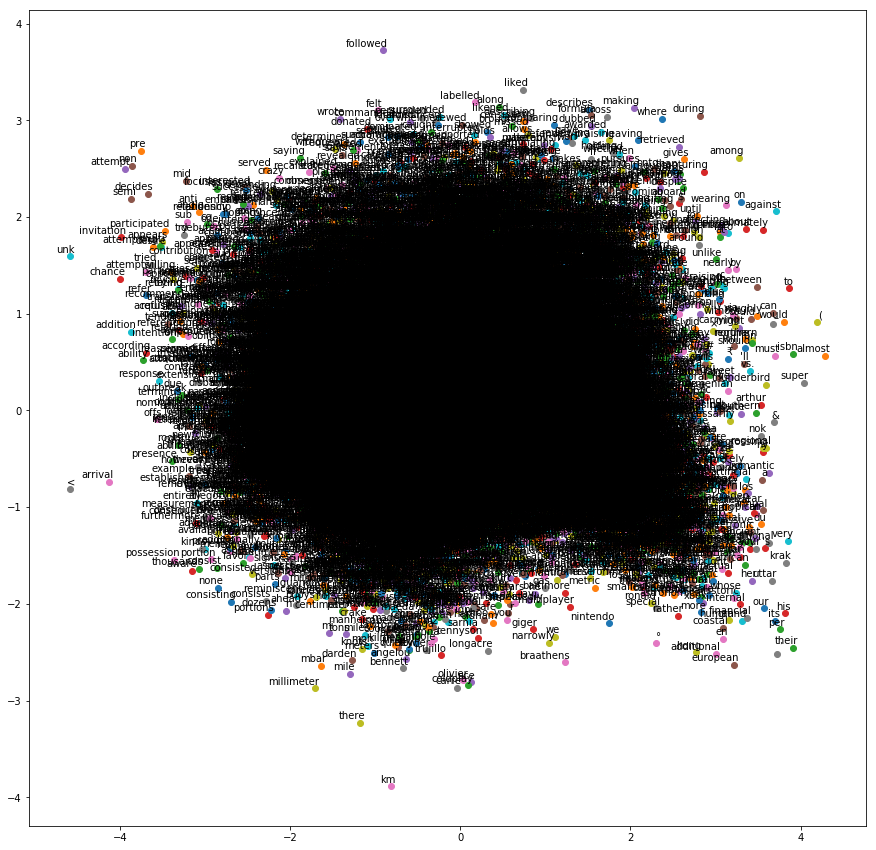

In [68]:
plot(two_d_embeddings, TEXT.vocab.itos)

## PCA visualization 2 (take only 100 words)

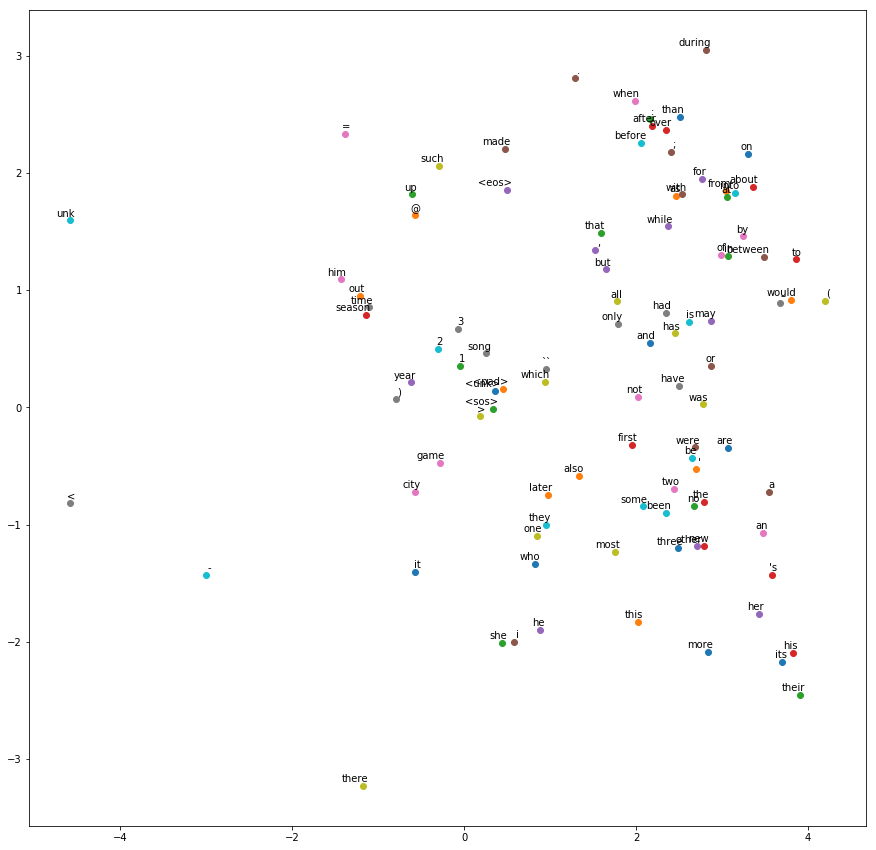

In [69]:
plot(two_d_embeddings, TEXT.vocab.itos[:100])

With just a 100 words, we can see some patterns in the clustering such as pronouns like i, he and she clustering as well as time related propositions such as before, after, ever, while and during clustering

# Question 3

In [100]:
import torch
from torch import nn
class EncoderModel(nn.Module):
    def __init__(self, vocab_size,emb_size, dropout=0.5):
        super(EncoderModel, self).__init__()
        self.drop = nn.Dropout(dropout)
        self.encoder = nn.Embedding(vocab_size, emb_size)
        self.init_weights()
 
    def init_weights(self):
        '''Initialize weights'''
        initrange = 0.1
        self.encoder.weight.data.uniform_(-initrange, initrange)
 
    def forward(self, input_tensor):
        '''
        Args:
            input_tensor: float tensor, size: batch_size*word_num
            hidden: a tuple(LSTM initial states)
        Return:
            outputs: log softmax of prediction scores, word_num*batch_size*vocab_size
            hidden: a tuple(LSTM initial states)
        '''
        #Get embeddings for the input tensors
        emb = self.encoder(input_tensor)
        #dropout
        emb = self.drop(emb)
        #Remove history of hidden states
        return emb

In [115]:
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, emb_size,
                 hidden_size, num_layer, dropout=0.5):
        super(LSTMModel, self).__init__()
        self.drop = nn.Dropout(dropout)
        self.rnn = nn.LSTM(emb_size, hidden_size, num_layer, dropout=dropout)
        self.decoder = nn.Linear(hidden_size, vocab_size)
        self.softmax = nn.Softmax(dim=2)
        self.num_layer = num_layer
        self.hidden_size = hidden_size
        self.init_weights()
 
    def init_weights(self):
        '''Initialize weights'''
        initrange = 0.1
        self.decoder.bias.data.fill_(0)
        self.decoder.weight.data.uniform_(-initrange, initrange)
    
    def repackage_hidden(self, h):
        """Detach tensor from their history, no gradient backpropaged"""
        return tuple(v.detach() for v in h)
 
    def forward(self, input_tensor, hidden):
        '''
        Args:
            input_tensor: float tensor, size: batch_size*word_num
            hidden: a tuple(LSTM initial states)
        Return:
            outputs: log softmax of prediction scores, word_num*batch_size*vocab_size
            hidden: a tuple(LSTM initial states)
        '''
        #Remove history of hidden states
        hidden = self.repackage_hidden(hidden)
        #rnn layer
        output, hidden = self.rnn(input_tensor, hidden)
        #dropout
        output = self.drop(output)
        decoded = self.decoder(output.view(output.size(0)*output.size(1), output.size(2)))
        outputs = decoded.view(output.size(0), output.size(1), decoded.size(1))
        #Compute the softmax values
        outputs = self.softmax(outputs)
        #Set the values within a range
        outputs = torch.clamp(outputs, min=0.000000001, max=100000)
        #Compute log values
        outputs = torch.log(outputs)
        return outputs, hidden
 
    def init_hidden(self, batch_size):
        '''
        Initialize LSTM hidden states
        '''
        weight = next(self.parameters())
        return (weight.new_zeros(self.num_layer, batch_size, self.hidden_size),
                    weight.new_zeros(self.num_layer, batch_size, self.hidden_size))

In [118]:
encoder = EncoderModel(len(TEXT.vocab), 128)
forward_lstm = LSTMModel(len(TEXT.vocab), 128, 200, 2)
backward_lstm = LSTMModel(len(TEXT.vocab), 128, 200, 2)
optimizer=torch.optim.Adam([{'params': encoder.parameters(), 'params': forward_lstm.parameters(), 'params': backward_lstm.parameters()}],lr=0.01)
device = torch.device('cpu')
loss_fn = nn.NLLLoss()
training_loss = 0

for index, batch in enumerate(train_iter):
    data, target = batch.text.to(device), batch.target.to(device)
    optimizer.zero_grad()
    data = encoder.forward(data)
    reverse_data, reverse_target = torch.flip(data, [1]), torch.flip(target, [1])
    forward_hidden = forward_lstm.init_hidden(data.size()[1])
    backward_hidden = backward_lstm.init_hidden(reverse_data.size()[1])
    forward_output, _ = forward_lstm(data, forward_hidden)
    backward_output, __ = backward_lstm(reverse_data, backward_hidden)
    forward_loss = loss_fn(forward_output.reshape(forward_output.size()[0]*forward_output.size()[1], forward_output.size()[2]), target.view(-1))
    backward_loss = loss_fn(backward_output.reshape(backward_output.size()[0]*backward_output.size()[1], backward_output.size()[2]), reverse_target.view(-1))
    loss = forward_loss + backward_loss
    training_loss += loss.item()
    loss.backward()
    optimizer.step()
    print ('Trained %d batches, loss: %10f' %(index, training_loss), end="\r")
    
forward_lstm.eval()
backward_lstm.eval()
forward_loss = 0
backward_loss = 0

with torch.no_grad():
    for index, batch in enumerate(test_iter):
        data, target = batch.text.to(device), batch.target.to(device)
        data = encoder.forward(data)
        reverse_data, reverse_target = torch.flip(data, [1]), torch.flip(target, [1])
        forward_hidden = forward_lstm.init_hidden(data.size()[1])
        backward_hidden = backward_lstm.init_hidden(reverse_data.size()[1])
        forward_output, _ = forward_lstm(data, forward_hidden)
        backward_output, __ = backward_lstm(reverse_data, backward_hidden)
        forward_loss += loss_fn(forward_output.reshape(forward_output.size()[0]*forward_output.size()[1], forward_output.size()[2]), target.view(-1)).item()
        backward_loss += loss_fn(backward_output.reshape(backward_output.size()[0]*backward_output.size()[1], backward_output.size()[2]), reverse_target.view(-1)).item()
        print('Tested %d samples, forward loss: %10f, backward loss: %10f' %(index, forward_loss, backward_loss), end="\r")

## Forward loss perplexity

In [119]:
2**(forward_loss/len(test_iter))

1233.8797216358525

## Backward loss perplexity

In [120]:
2**(backward_loss/len(test_iter))

36.26648586097008

#### Task 6 (Optional, 6 points)
We can train our 2-layer bidirectional LSTM language model on a relatively large dataset [wikitext-103](https://s3.amazonaws.com/research.metamind.io/wikitext/wikitext-103-v1.zip) and explore some interesting characteristics of the model. Our tasks:
- Generate a piece of text ending with the STOP symbol but no more than 50 words given the START symbol, check whether it is fluent or not based on your tuition.
- Feed each sentence of the movie reviews in homework 1 to our language model, concatenate the outputs of forward and backward LSTMs as the contextualized embedding for each word in the sentence.
- Train the provided RNN Classifier in homework 1 based on the contextualized word embeddings of the train set, tune parameters on the development set and evaluate the performances on the test set.
- Consider “play”, a highly polysemous word, find 20 sentences including "play", half of them refer to the verb, and half of them refer to the noun. Visualize the contextualized embeddings of "play" in the sentences, check whether the embeddings can capture the contextual information or not.

References: 

- [EXPLORING THE LIMITS OF LANGUAGE MODELING](https://arxiv.org/pdf/1602.02410.pdf)
- [IMPROVING NEURAL LANGUAGE MODELS WITH A CONTINUOUS CACHE](https://arxiv.org/pdf/1612.04426.pdf)
- [LEARNING LONGER MEMORY IN RECURRENT NEURAL NETWORKS](https://arxiv.org/pdf/1412.7753.pdf)

In [ ]:
##Write your code here

### Requirements:
- This is an individual report.
- Complete the code using Python.
- List students with whom you have discussed if there are any.
- Follow the honor code strictly.

### Free GPU Resources
We suggest that you run neural language models on machines with GPU(s). Google provides the free online platform [Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb), a research tool for machine learning education and research. It’s a Jupyter notebook environment that requires no setup to use as common packages have been  pre-installed. Google users can have access to a Tesla T4 GPU (approximately 15G memory). Note that when you connect to a GPU-based VM runtime, you are given a maximum of 12 hours at a time on the VM.

It is convenient to upload local Jupyter Notebook files and data to Colab, please refer to the [tutorial](https://colab.research.google.com/notebooks/io.ipynb). 

In addition, Microsoft also provides the online platform [Azure Notebooks](https://notebooks.azure.com/help/introduction) for research of data science and machine learning, there are free trials for new users with credits.